# Data Exploration

The purpose of this notebook is to examine and visualize the data with respect to various aspects.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!python -m pip uninstall matplotlib
!pip install matplotlib==3.1.3

In [ ]:
# Import statements

import os

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
%cd /content/drive/MyDrive/data

In [ ]:
rootdir = '/content/drive/MyDrive/data'
output_imgs = '/content/drive/MyDrive/outputs/imgs'

In [ ]:
df = pd.read_csv(os.path.join(rootdir, 'annotations.csv'))

In [ ]:
df.head()

,folder,filename,width,height,depth,segmented,name,pose,truncated,difficult,xmin,ymin,xmax,ymax
0,50,20210324_193102.jpg,3024,3024,3,0,50,50,50,50,999,1084,1434,1496
1,50,20210324_193102.jpg,3024,3024,3,0,50,50,50,50,1540,1071,2003,1502
2,50,20210324_193102.jpg,3024,3024,3,0,50,50,50,50,687,1515,1168,1968
3,50,20210324_193102.jpg,3024,3024,3,0,50,50,50,50,1309,1552,1768,1993
4,50,20210324_193102.jpg,3024,3024,3,0,50,50,50,50,1899,1549,2381,2006


# Overall distribution of classes

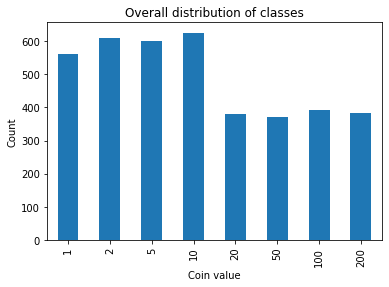

In [ ]:
ax = df['pose'].value_counts().sort_index().plot(kind = 'bar', title = 'Overall distribution of classes', ylabel = 'Count', xlabel = 'Coin value')
ax.figure.savefig(os.path.join(output_imgs, 'overall_distribution_of_classes.png'), bbox_inches='tight')

# Images per Folder

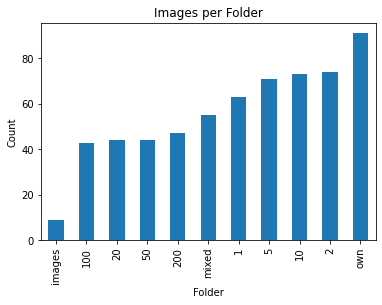

In [ ]:
ax = df.groupby(by = 'folder')['filename'].nunique().sort_values().plot(kind = 'bar', title = 'Images per Folder', ylabel = 'Count', xlabel = 'Folder')
ax.figure.savefig(os.path.join(output_imgs, 'images_per_folder.png'), bbox_inches='tight')

# Number of objects per image

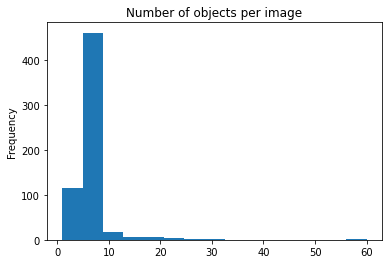

In [ ]:
ax = df.groupby(by = 'filename').size().plot.hist(title = 'Number of objects per image', bins = 15)
ax.figure.savefig(os.path.join(output_imgs, 'number_of_objects_per_image.png'), bbox_inches='tight')

# Classes Distribution for mixed images

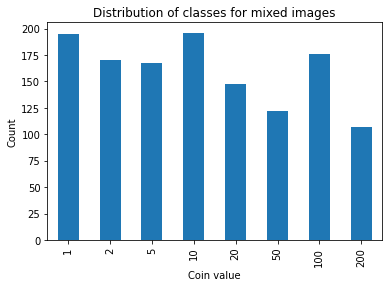

In [ ]:
ax = df[df['folder'].isin(['mixed', 'images', 'own'])]['pose'].value_counts().sort_index().plot(kind = 'bar', title = 'Distribution of classes for mixed images', ylabel = 'Count', xlabel = 'Coin value')
ax.figure.savefig(os.path.join(output_imgs, 'distribution_of_classes_for_mixed_images.png'), bbox_inches='tight')

# Width & Height Comparison

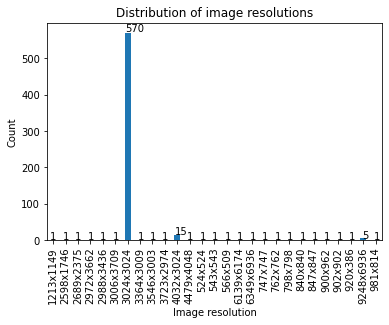

In [ ]:
width_height = (df.groupby(by = 'filename').first()['width'].astype(str) + 'x'  + df.groupby(by = 'filename').first()['height'].astype(str)).value_counts()
ax = width_height.sort_index().plot(kind = 'bar', title = 'Distribution of image resolutions', ylabel = 'Count', xlabel = 'Image resolution')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.006))
ax.figure.savefig(os.path.join(output_imgs, 'distribution_of_image_resolutions.png'), bbox_inches='tight')